In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from imblearn.over_sampling import SMOTE

import matplotlib.pyplot as plt
import seaborn as sns


                 precision    recall  f1-score   support

         Europe       0.75      0.83      0.79        64
         France       0.82      0.98      0.89        86
        Germany       0.83      0.99      0.90        70
      Hong Kong       0.66      0.53      0.59        81
      Indonesia       0.79      0.93      0.85        68
          Japan       0.75      0.88      0.81        57
 Mainland China       0.65      0.43      0.52        74
       Malaysia       0.74      0.85      0.79        66
    Middle East       0.78      0.60      0.68        65
  North America       0.81      0.71      0.76        66
North East Asia       0.95      0.98      0.97        58
        Oceania       0.77      0.77      0.77        71
    Philippines       0.86      0.98      0.91        60
     South Asia       0.68      0.55      0.61        78
South East Asia       1.00      0.97      0.99        78
       Thailand       0.73      0.78      0.76        65
 United Kingdom       0.89    

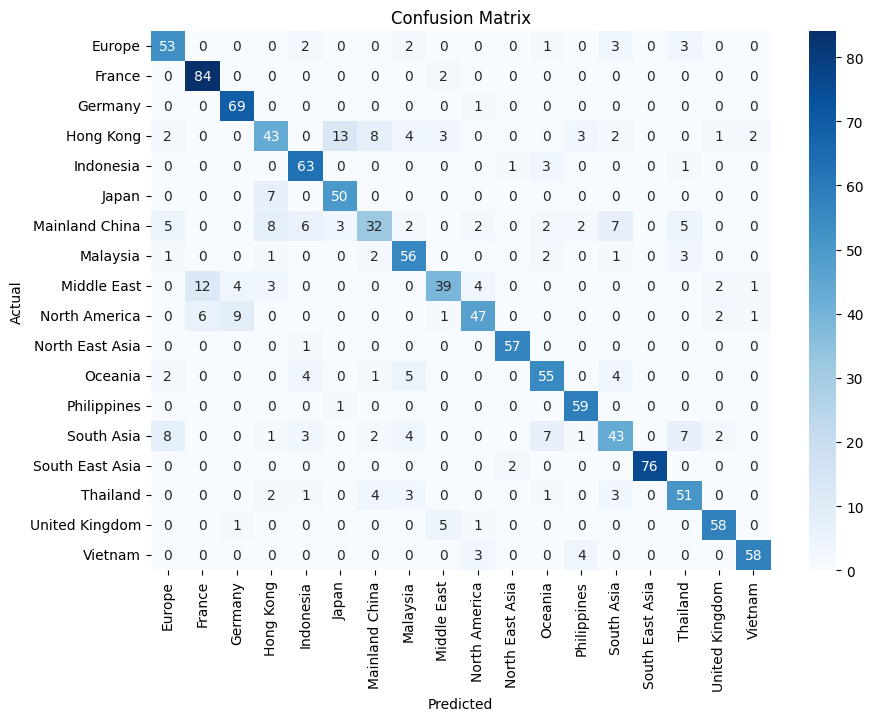

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Load final dataset
df = pd.read_csv("final_dataset_with_inflation_by_country.csv")

# Define features and target variable
X = df.drop(columns=['Country'])  # Feature set
y = df['Country']  # Target variable

# Split data into train and test sets BEFORE SCALING
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale numerical features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit & transform training data
X_test_scaled = scaler.transform(X_test)  # Transform test data with the same scaler

# Train RandomForestClassifier on the SCALED data
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred = classifier.predict(X_test_scaled)

# Print classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classifier.classes_, yticklabels=classifier.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


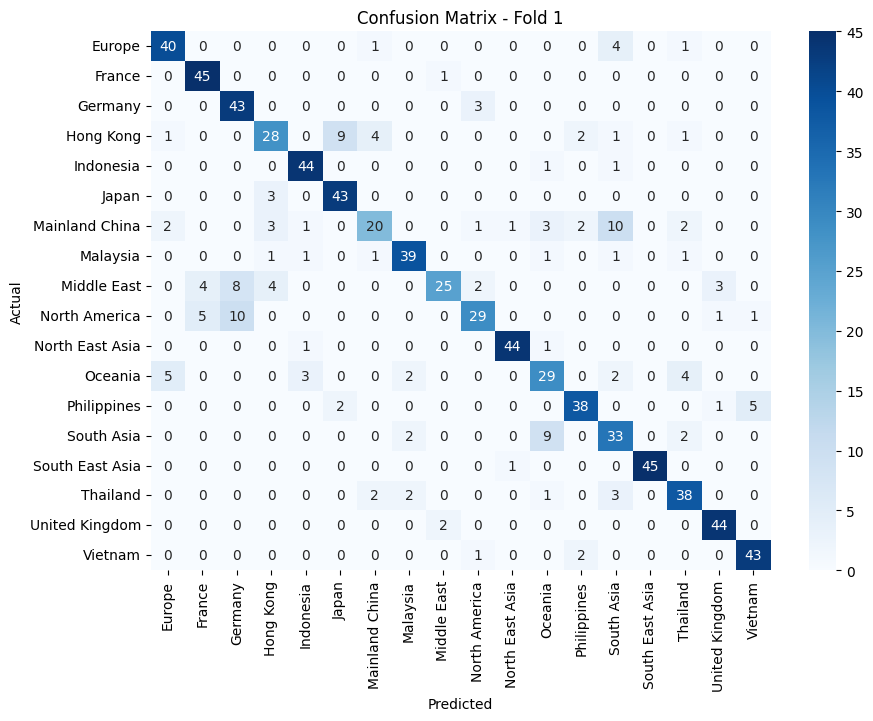

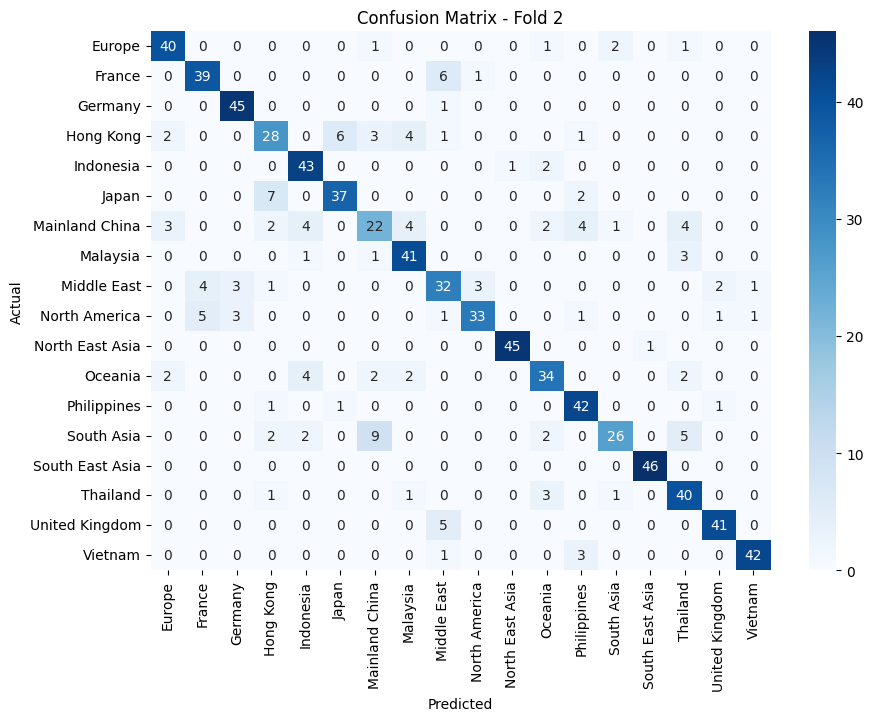

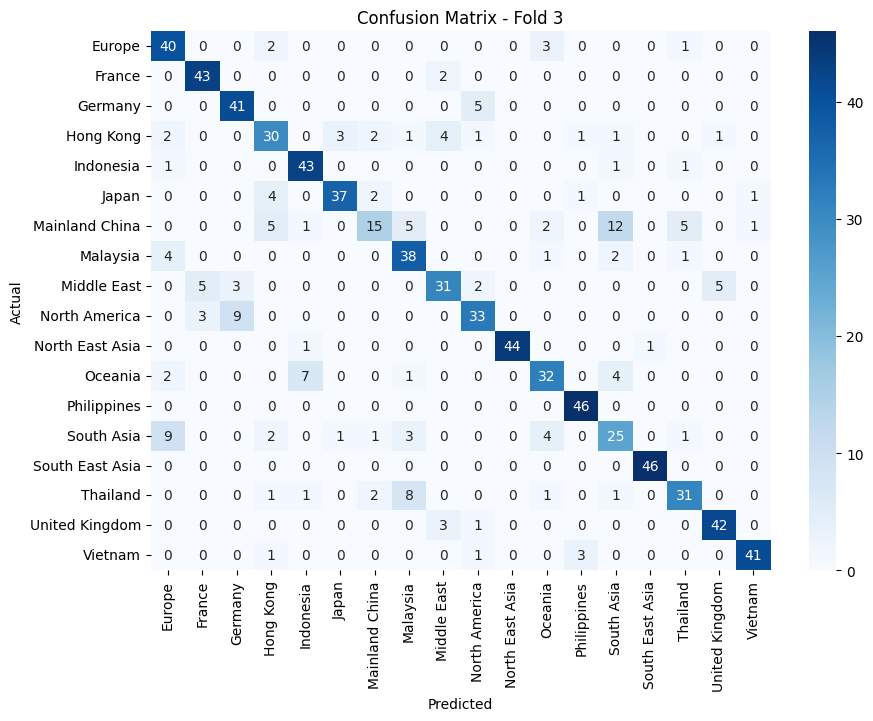

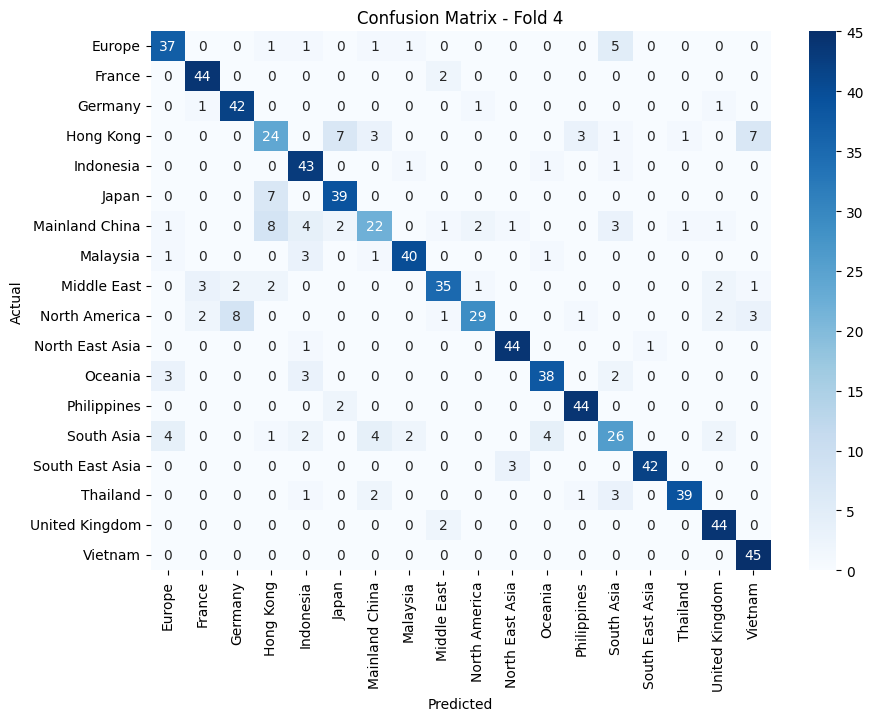

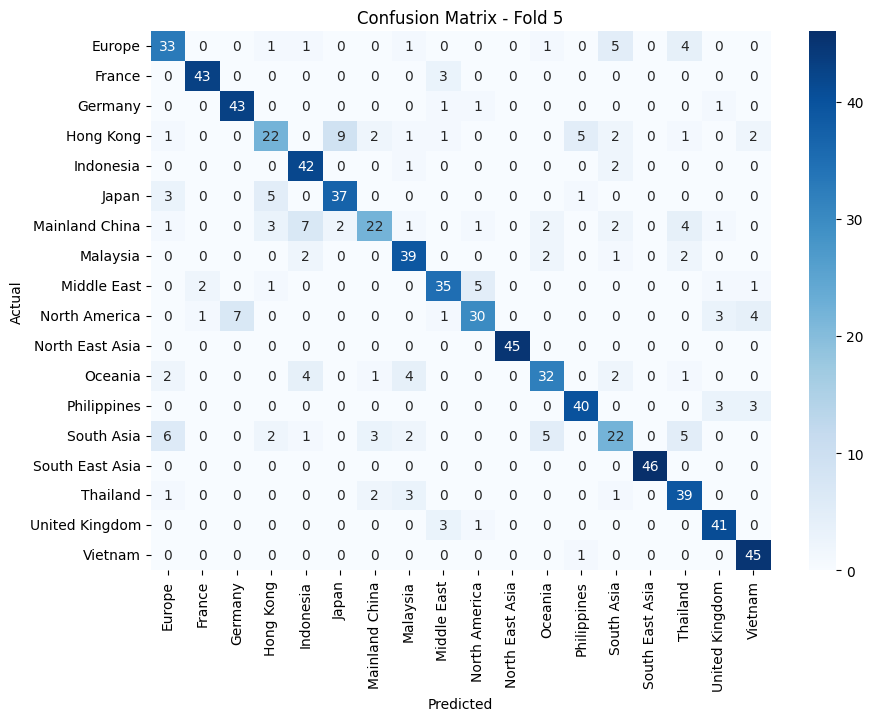

Mean Accuracy: 0.8098
Mean F1 Score: 0.8042
Mean Precision: 0.8092
Mean Recall: 0.8098


In [3]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize Stratified K-Fold Cross-Validation (5 folds)
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Store performance metrics
accuracy_list = []
f1_list = []
precision_list = []
recall_list = []
conf_matrices = []

# Perform cross-validation
for fold, (train_index, val_index) in enumerate(kf.split(X, y)):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]

    # Train Random Forest Classifier
    classifier = RandomForestClassifier(random_state=42)
    classifier.fit(X_train, y_train)
    
    # Predictions
    y_pred = classifier.predict(X_val)
    
    # Store evaluation metrics
    accuracy_list.append(accuracy_score(y_val, y_pred))
    f1_list.append(f1_score(y_val, y_pred, average='weighted'))
    precision_list.append(precision_score(y_val, y_pred, average='weighted'))
    recall_list.append(recall_score(y_val, y_pred, average='weighted'))

    # Compute confusion matrix
    cm = confusion_matrix(y_val, y_pred)
    conf_matrices.append(cm)
    
    # Plot confusion matrix for each fold
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classifier.classes_, yticklabels=classifier.classes_)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - Fold {fold + 1}')
    plt.show()

# Print average results
print(f"Mean Accuracy: {np.mean(accuracy_list):.4f}")
print(f"Mean F1 Score: {np.mean(f1_list):.4f}")
print(f"Mean Precision: {np.mean(precision_list):.4f}")
print(f"Mean Recall: {np.mean(recall_list):.4f}")


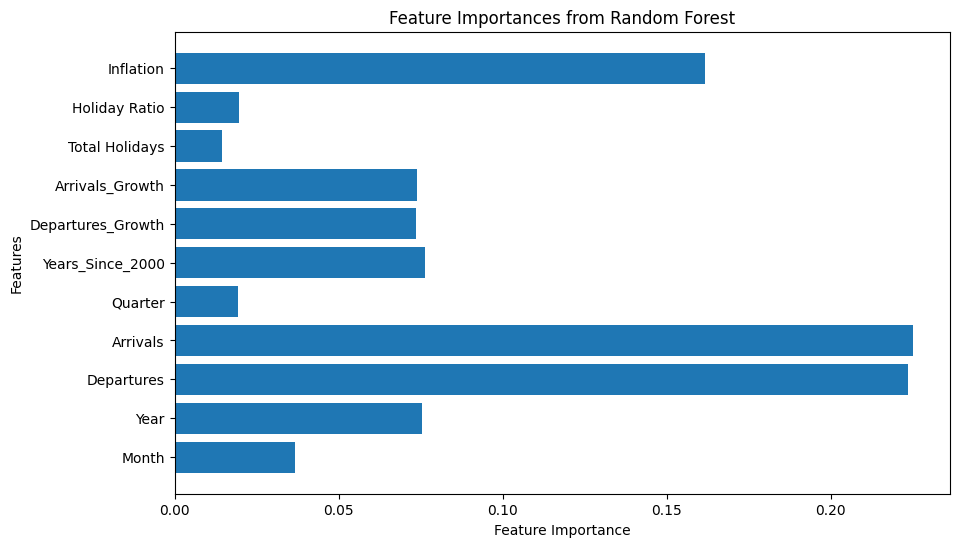

In [4]:
import matplotlib.pyplot as plt

# Get feature importances
feature_importances = classifier.feature_importances_

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(X.columns, feature_importances)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importances from Random Forest")
plt.show()


In [5]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, balanced_accuracy_score

param_dist = {
    'bootstrap': [True, False],
    'max_depth': [5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4, 6],
    'min_samples_split': [2, 5, 10, 15],
    'n_estimators': [100, 200, 500, 1000]
}

rf_grid = GridSearchCV(estimator = classifier, param_grid = param_dist, cv = 3, n_jobs = -1, verbose = 2)

rf_grid.fit(X_train, y_train)

# Evaluate best model
y_pred = rf_grid.best_estimator_.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Balanced Accuracy: {balanced_accuracy:.4f}")


Fitting 3 folds for each of 512 candidates, totalling 1536 fits
Accuracy: 0.9652
Balanced Accuracy: 0.9663


In [6]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, balanced_accuracy_score

param_dist = {
    'bootstrap': [True, False],
    'max_depth': [5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4, 6],
    'min_samples_split': [2, 5, 10, 15],
    'n_estimators': [100, 200, 500, 1000]
}


random_search = RandomizedSearchCV(classifier, param_distributions=param_dist, 
                                   n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)

# Evaluate best model
y_pred = random_search.best_estimator_.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Balanced Accuracy: {balanced_accuracy:.4f}")


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Accuracy: 0.9685
Balanced Accuracy: 0.9696
